In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
df = pd.read_csv("AviationData.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Aircraft.damage','Make','Model','Engine.Type','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Injury.Severity','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")

C:\Users\sebas\AppData\Local\Temp\ipykernel_1720\713402779.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Aircraft.damage','Make','Model','Engine.Type','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Injury.Severity','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")


In [159]:
# z kolumny 'Event.Date' wyciągamy do osobnych kolumn rok, miesiąc i dzień
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month_name()
df['Day'] = df['Event.Date'].dt.day_name()

# z kolumny 'Location' wyciągamy do osbnych kolumn miasto i stan
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]

# 'Unk' i 'UNK' zamieniamy na jedną wartość 'Unknown'
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True)

# wartości np. Fatal(1), Fatal(123) zamieniamy na jedną wartość 'Fatal'
df['Injury.Severity'] = df['Injury.Severity'].str.replace('Fatal.*', 'Fatal')

# puste wartości uzupełniamy najczęściej występującymi wartościami w danej kolumnie
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0])
df['Weather.Condition'] = df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0])
df['Engine.Type'] = df['Engine.Type'].fillna(df['Engine.Type'].mode()[0])
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])

# w kolumnie number.of.Engines średnia oraz mediana jest podabna, wiec uzupełniam puste wartosci medianą
df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace=True)

C:\Users\sebas\AppData\Local\Temp\ipykernel_1720\850482051.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Injury.Severity'] = df['Injury.Severity'].str.replace('Fatal.*', 'Fatal')


In [160]:
# poniższy kod zamienia wszystkie wartości NaN na 'Unavailable' albo 'Unknown' dla kolumn gdzie już takie wartości występują. 
# Dzięki temu po późniejszym zastosowaniu df.dropna() zamiast 50k rekordów zostaje aż 77k. 
# Pytanie tylko czy wartości 'Unknown' w modelu mają jakikolwiek sens i czy nie lepiej faktycznie zredukować dane do tych 50k.
'''
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
'''

"\ndf['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')\ndf['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')\ndf['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')\ndf['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')\ndf['Make'] = df['Make'].fillna('Unknown')\n"

In [161]:
df = df.dropna()

In [162]:
df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].agg(['count', 'min', 'max', 'mean', 'sum'])

,count,min,max,mean,sum
Broad.phase.of.flight,,,,,
Approach,5415,0.0,228.0,0.705263,3819.0
Climb,1649,0.0,230.0,1.056398,1742.0
Cruise,8391,0.0,111.0,0.721249,6052.0
Descent,1454,0.0,82.0,0.621733,904.0
Go-around,1116,0.0,37.0,0.524194,585.0
Landing,11614,0.0,34.0,0.042793,497.0
Maneuvering,7104,0.0,68.0,0.741132,5265.0
Other,96,0.0,11.0,0.875000,84.0
Standing,553,0.0,34.0,0.195298,108.0


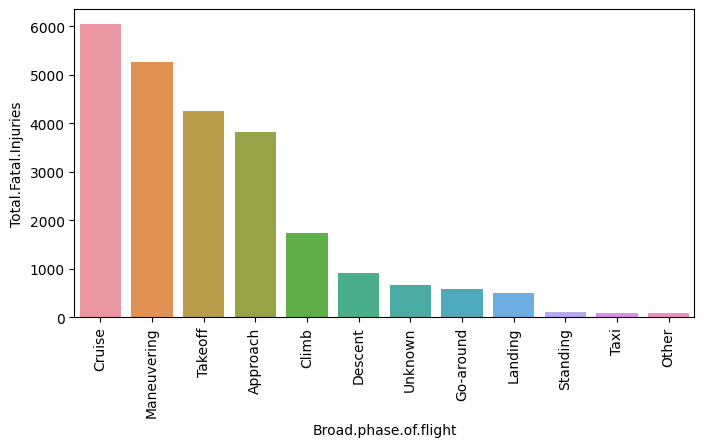

In [163]:
phase_flight_grouped= df.groupby("Broad.phase.of.flight").sum('Total.Fatal.Injuries').reset_index().sort_values(by='Total.Fatal.Injuries',ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data = phase_flight_grouped, x = phase_flight_grouped['Broad.phase.of.flight'],y= phase_flight_grouped['Total.Fatal.Injuries'], estimator = sum)
plt.xticks(rotation=90)
plt.show()

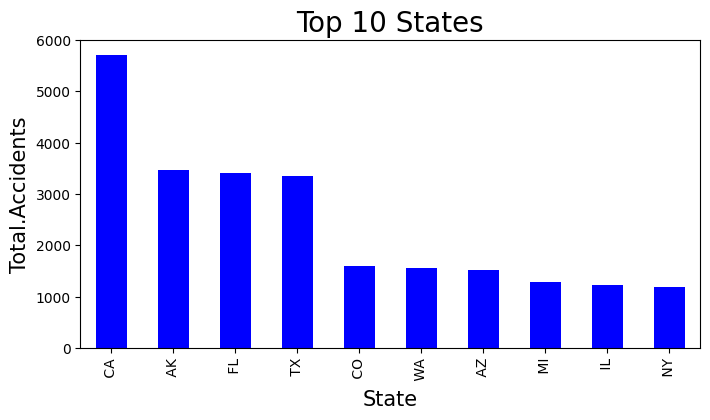

In [164]:
plt.figure(figsize=(8,4))
df['State'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xticks(rotation=90)
plt.xlabel("State", size=15)
plt.ylabel("Total.Accidents", size=15)
plt.title("Top 10 States", size=20)
plt.show()

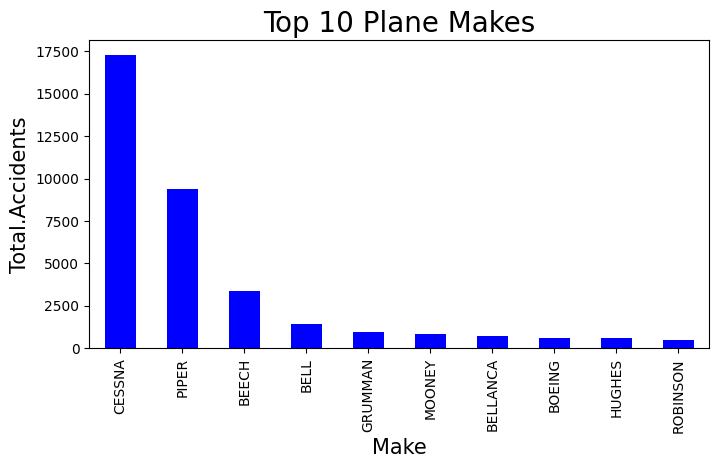

In [165]:
plt.figure(figsize=(8,4))
df['Make'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xticks(rotation=90)
plt.xlabel("Make", size=15)
plt.ylabel("Total.Accidents", size=15)
plt.title("Top 10 Plane Makes", size=20)
plt.show()

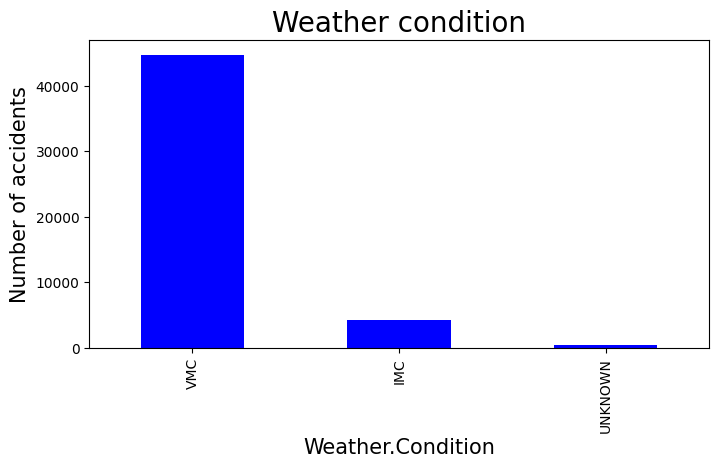

In [166]:
plt.figure(figsize=(8,4))
df['Weather.Condition'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xlabel("Weather.Condition", size=15)
plt.ylabel("Number of accidents", size=15)
plt.title("Weather condition", size=20)
plt.show()

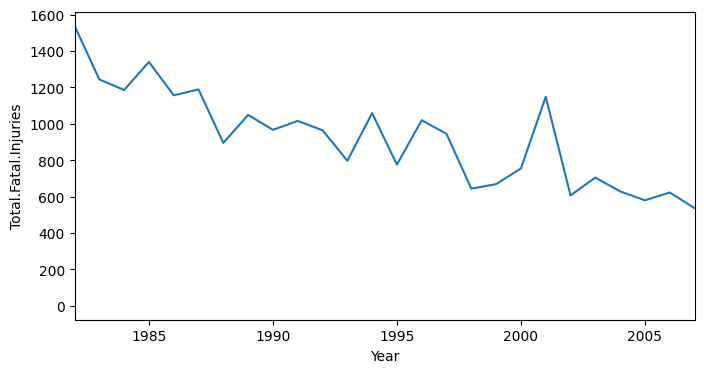

In [167]:
plt.figure(figsize = (8,4))
ax = sns.lineplot(data = df, x = df['Year'], y= df['Total.Fatal.Injuries'],estimator=sum,errorbar=None)
ax.set_xlim(1982,2007)
plt.show()

<Axes: xlabel='Weather.Condition', ylabel='Total.Fatal.Injuries'>

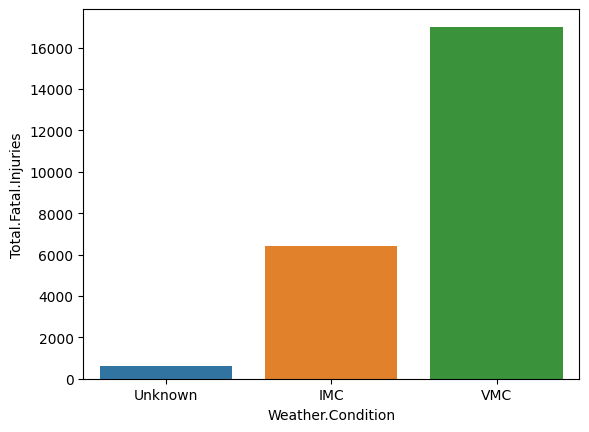

In [168]:
sns.barplot(data=df,x='Weather.Condition',y='Total.Fatal.Injuries',errorbar=None,estimator=sum)

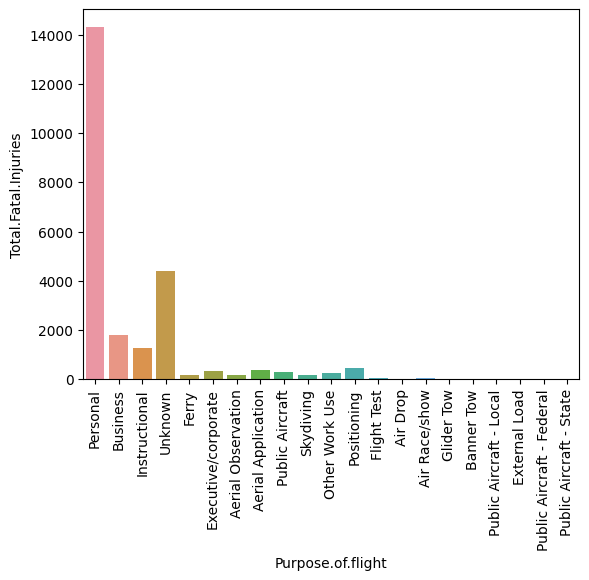

In [169]:
sns.barplot(data = df,x=df['Purpose.of.flight'],y=df['Total.Fatal.Injuries'],errorbar=None,estimator=sum)
plt.xticks(rotation=90);